In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
df=pd.read_csv('data_cancer.csv')

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [175]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [176]:
df=df.drop(['Unnamed: 32','id'],axis=1)
df.shape

(569, 31)

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X=df.iloc[:,1:33]
Y=df.iloc[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=1)



#make sure Y will be the output results
Y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [178]:
knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
knn.fit(X_train,y_train)


KNeighborsClassifier(n_jobs=1)

In [179]:
knn.score(X_test,y_test)


0.9370629370629371

In [180]:
accuracy = []
max_accuracy=0

# Calculating score for K values between 1 and 40
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    accuracy.append(score)
    if score>max_accuracy:
      max_accuracy=score
      k=i


print('max accuracy:',max_accuracy)
print('at k=',k)

max accuracy: 0.9440559440559441
at k= 4


Text(0, 0.5, 'Accuracy')

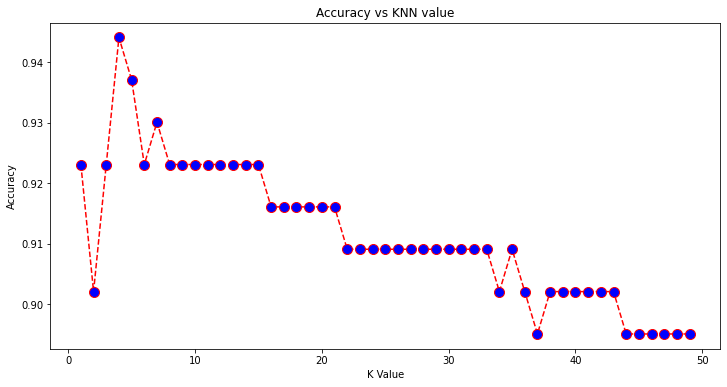

In [181]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs KNN value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')



In [182]:
#random select 4th row from X_test, note: X_test has no result
df_predict=X_test.iloc[3:4,:]
df_predict.shape
df_predict.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
186,18.31,18.58,118.6,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.2,1410.0,0.1234,0.2445,0.3538,0.1571,0.3206,0.06938


In [183]:
#produce output with input of df_predict
prediction_test=knn.predict(df_predict)
if prediction_test=='B':
  print('Benign')
else:
  print('Malignant')

Malignant
